<a href="https://colab.research.google.com/github/Diyabaghla/PlantSense-Hack-n-Win-2.0/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile("/content/archive (19).zip")
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 255
CHANNEL = 3
EPOCHS = 20

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
directory='/content/Potato',
seed=123,
shuffle = True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 1500 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Test', 'Train', 'Valid']

In [ ]:
datasett = tf.keras.preprocessing.image_dataset_from_directory(
directory='/content/Potato/Train',
seed=123,
shuffle = True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 900 files belonging to 3 classes.


In [ ]:
class_names = datasett.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image_batch,label_batch in datasett.take(1):
    print("Image Batch Shape : ", image_batch.shape)
    print("Single Image : ", image_batch[0])
    print("Label Image numpy : ", label_batch.numpy)

Image Batch Shape :  (32, 255, 255, 3)
Single Image :  tf.Tensor(
[[[146.89827  134.89827  138.89827 ]
  [117.32479  105.32479  109.32479 ]
  [159.80559  147.80559  151.80559 ]
  ...
  [189.00586  179.00586  178.00586 ]
  [188.99608  178.99608  177.99608 ]
  [188.99413  178.99413  177.99413 ]]

 [[125.09177  113.09177  117.09177 ]
  [153.73062  141.73062  145.73062 ]
  [135.74919  123.74919  127.74919 ]
  ...
  [187.0177   177.0177   176.0177  ]
  [187.01765  177.01765  176.01765 ]
  [186.02547  176.02547  175.02547 ]]

 [[131.32344  119.323456 123.323456]
  [126.39447  114.39447  118.39447 ]
  [143.41678  131.41678  135.41678 ]
  ...
  [190.0195   180.0195   179.0195  ]
  [190.00006  180.00006  179.00006 ]
  [190.       180.       179.      ]]

 ...

 [[133.22902  120.22902  127.22902 ]
  [135.18733  122.18733  129.18733 ]
  [146.90227  133.90227  140.90227 ]
  ...
  [166.02007  156.02007  165.02007 ]
  [160.97076  150.97076  159.97076 ]
  [167.92755  157.92755  166.92755 ]]

 [[138.9

In [ ]:
len(class_names)

3

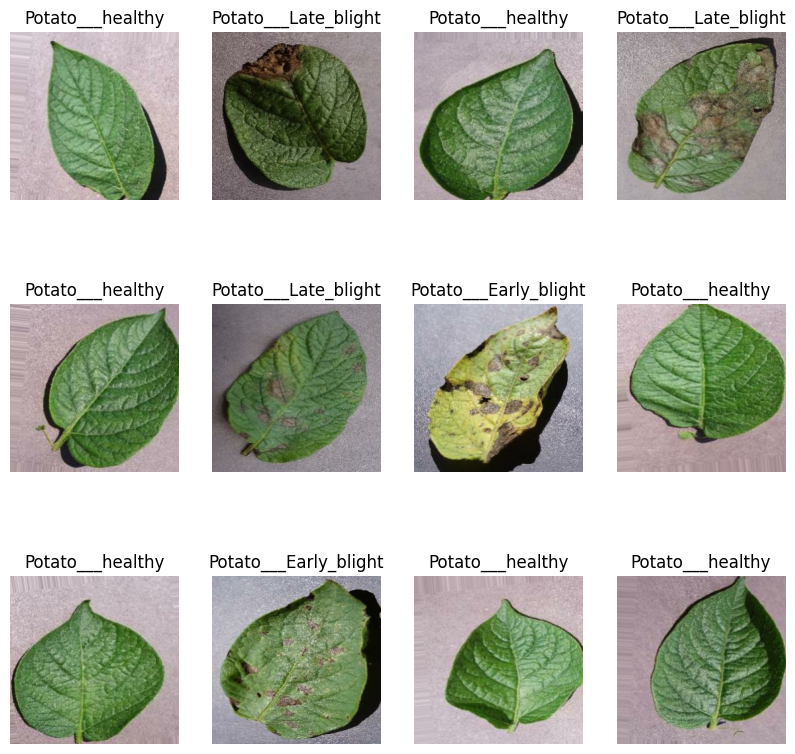

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in datasett.take(1):
    # Code to process the first batch of images and labels
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
# Define the mapping of old class names to new names
class_name_mapping = {
    'Potato___Early_blight': 'Early Blight',
    'Potato___Late_blight': 'Late Blight',
    'Potato___healthy': 'Healthy'
}

In [ ]:
# Load dataset
"""dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/plantVillage/Train',  # Ensure this contains class folders
    seed=123,
    shuffle=True,
    image_size=(224, 224),
    batch_size=16
)"""

# Get original class names detected by TensorFlow
original_class_names = datasett.class_names
print("Original Class Names:", original_class_names)

# Apply the new mapping
new_class_names = [class_name_mapping[name] for name in original_class_names]
print("Updated Class Names:", new_class_names)

Original Class Names: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
Updated Class Names: ['Early Blight', 'Late Blight', 'Healthy']


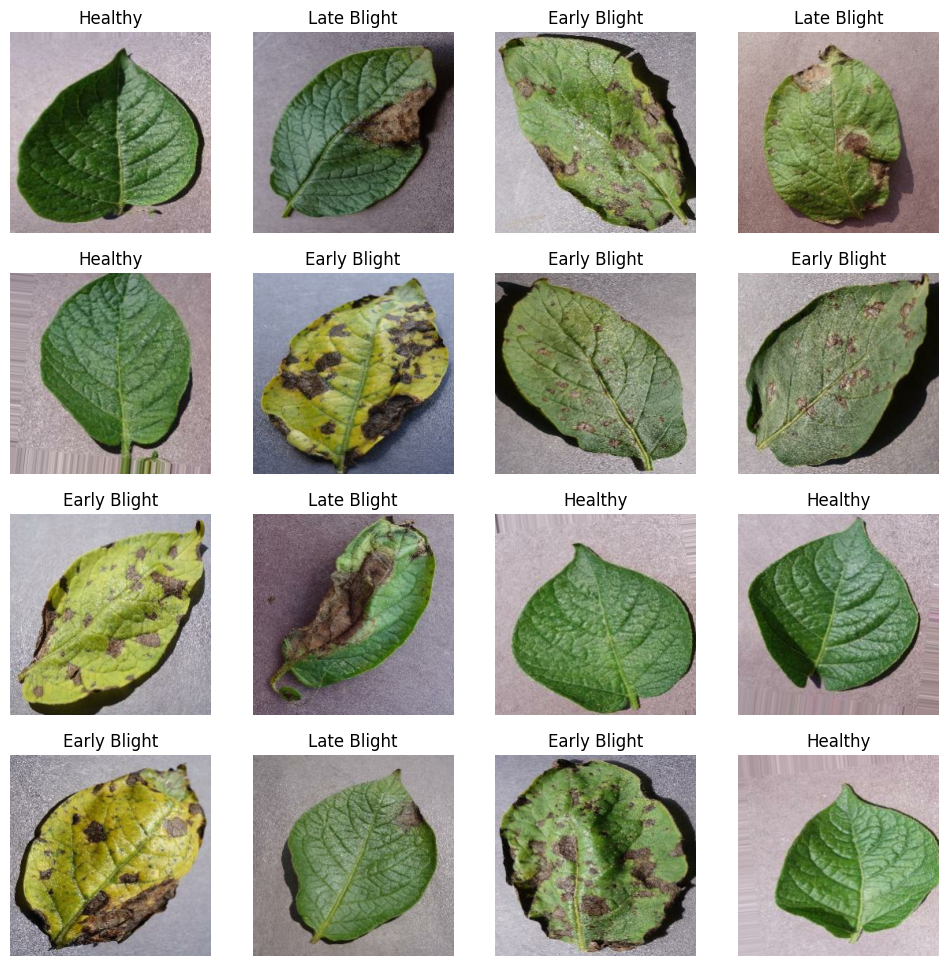

In [ ]:
plt.figure(figsize=(12, 12))

for images, labels in datasett.take(1):  # Take one batch
    for i in range(16):  # Display 16 images
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert image format

        # Convert label index to new class name
        label_index = labels[i].numpy()
        new_label = new_class_names[label_index]  # Get mapped class name

        plt.title(new_label)  # Display the new label
        plt.axis("off")

plt.show()

In [ ]:
len(dataset)

47

In [ ]:
train_size = 0.8
len(dataset) * train_size

37.6

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

47

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

0

In [ ]:
val_size = 0.1
len(dataset)*val_size

4.7

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

37

In [ ]:
len(val_ds)

4

In [ ]:
len(test_ds)

6

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf


# Fixed preprocessing pipeline
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # No 'experimental' needed
    tf.keras.layers.Rescaling(1./255)  # Normalize pixel values
])

print("Preprocessing pipeline created successfully!")

Preprocessing pipeline created successfully!


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Data Augmentation pipeline (Fixed)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images
    layers.RandomRotation(0.2)  # Randomly rotate images
])

print("Data augmentation pipeline created successfully!")


Data augmentation pipeline created successfully!


In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 255, 255, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 253, 253, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 126, 126, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 124, 124, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.5774 - loss: 0.9856 - val_accuracy: 0.6562 - val_loss: 0.8858
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step - accuracy: 0.6228 - loss: 0.9421 - val_accuracy: 0.6562 - val_loss: 0.8912
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 158s 4s/step - accuracy: 0.5924 - loss: 0.9735 - val_accuracy: 0.6562 - val_loss: 0.9012
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - accuracy: 0.5974 - loss: 0.9612 - val_accuracy: 0.6562 - val_loss: 0.8875
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 158s 4s/step - accuracy: 0.6210 - loss: 0.9374 - val_accuracy: 0.6562 - val_loss: 0.8909
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 207s 4s/step - accuracy: 0.5971 - loss: 0.9552 - val_accuracy: 0.6562 - val_loss: 0.8996
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.5774 - loss: 0.9747 - val_accuracy: 0.6562 - val_loss: 0.8894
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - accuracy: 0.5872 - loss: 0.9683 - val_accuracy: 0.6562 - v

In [ ]:
scores = model.evaluate(test_ds)


6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4850 - loss: 1.0613


In [ ]:

print(history)
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 20, 'steps': 37}
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
model.save("model.h5")

NameError: name 'model' is not defined

In [ ]:
model.save('modell.keras')

In [ ]:
tf.keras.saving.save_model(model, 'my_model.keras')

AttributeError: module 'tensorflow.keras' has no attribute 'saving'

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9817060828208923,
 0.9577723741531372,
 0.957623302936554,
 0.9501051306724548,
 0.953594982624054]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
print(acc)

[0.5983051061630249, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287, 0.6059321761131287]


In [ ]:
print(val_acc)

[0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625]


In [ ]:
print(loss)

[0.9817060828208923, 0.9577723741531372, 0.957623302936554, 0.9501051306724548, 0.953594982624054, 0.949522078037262, 0.9471811056137085, 0.9502906799316406, 0.9462013244628906, 0.9491932988166809, 0.9462667107582092, 0.9467343091964722, 0.9493715167045593, 0.947787344455719, 0.9480044841766357, 0.9471715092658997, 0.9446083307266235, 0.9445008635520935, 0.9449957609176636, 0.9473653435707092]


In [ ]:
print(val_loss)

[0.8857749104499817, 0.8911868333816528, 0.9011553525924683, 0.887473464012146, 0.8909198641777039, 0.8995611667633057, 0.8893965482711792, 0.8855725526809692, 0.8869631886482239, 0.8926657438278198, 0.8982582688331604, 0.8999103903770447, 0.8918426036834717, 0.9018063545227051, 0.8901735544204712, 0.8830634951591492, 0.8949103355407715, 0.8858484029769897, 0.8894408941268921, 0.9003163576126099]


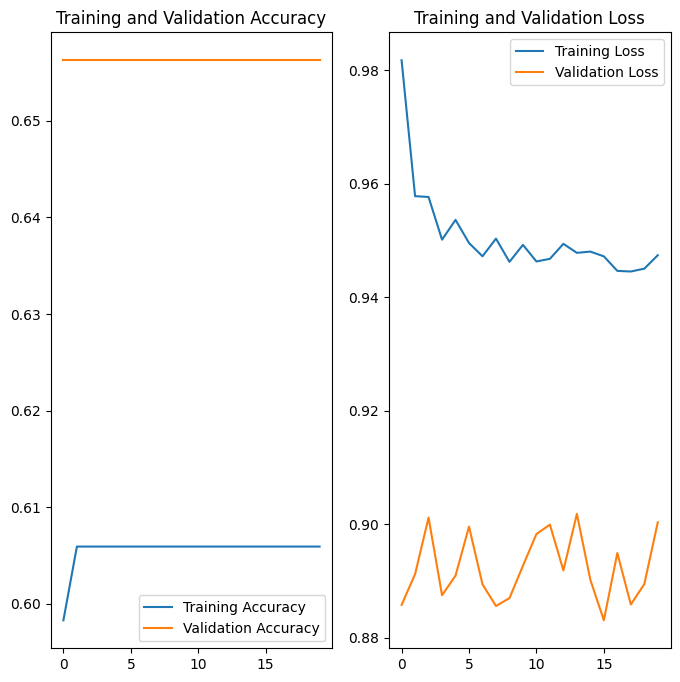

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model = tf.keras.models.load_model('modell.keras')

first image to predict
actual label: Early Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Late Blight


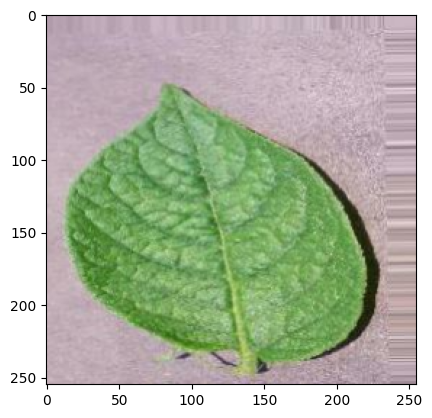

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",new_class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",new_class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = new_class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


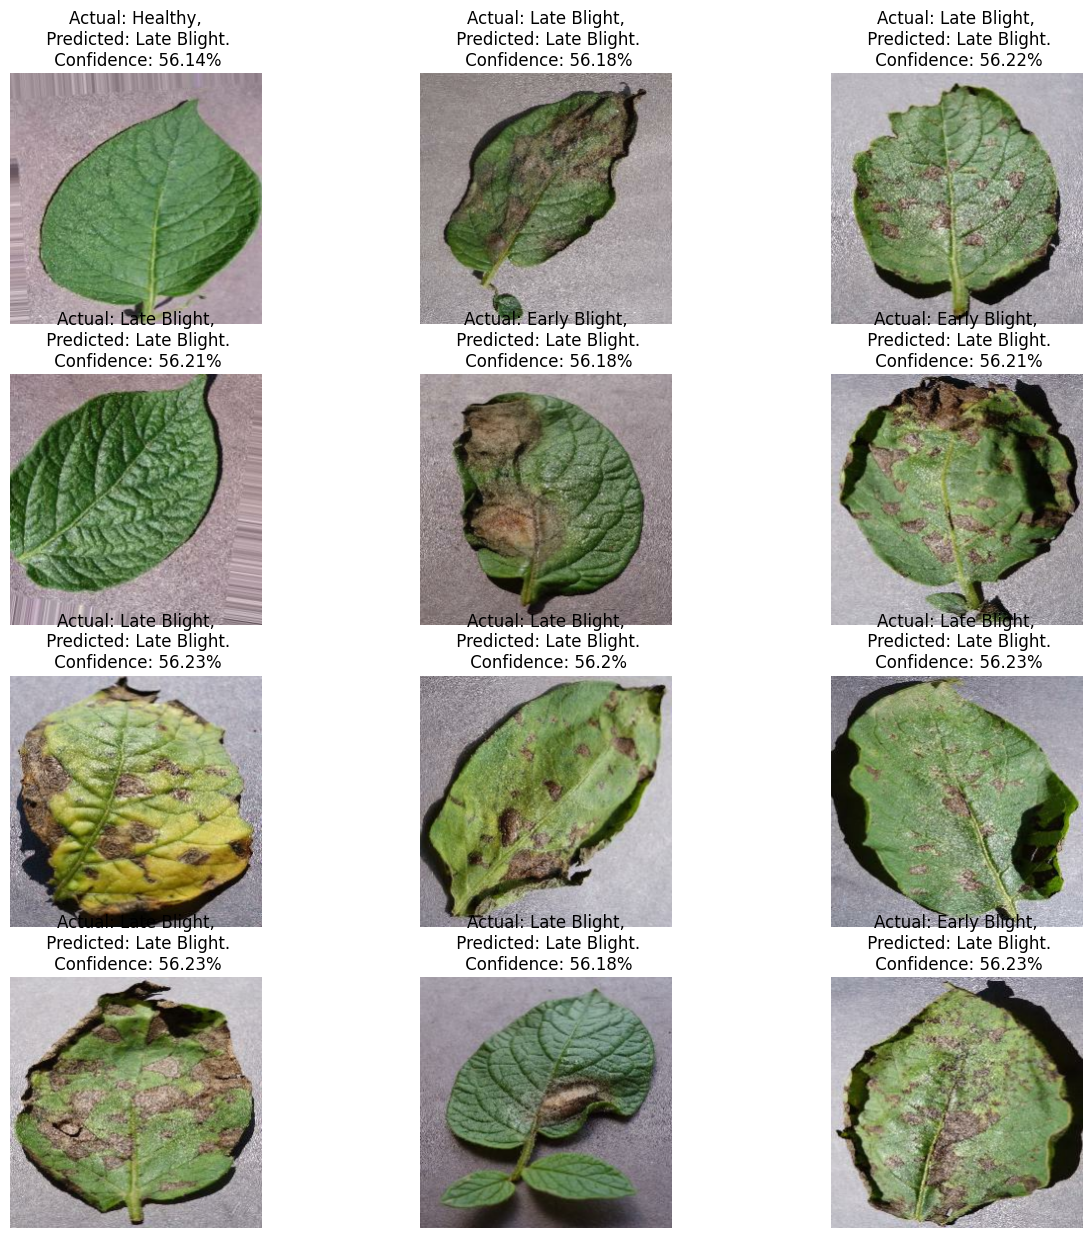

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = new_class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
directory='/content/train',
seed=123,
shuffle = True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 645 files belonging to 2 classes.


In [ ]:
class_names = dataset.class_names
class_names

['images', 'labels']

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Define paths
image_dir = "/content/train/images"  # Folder containing images
label_dir = "/content/train/labels"  # Folder containing label text files

# Load image filenames
image_files = sorted(os.listdir(image_dir))  # Sort to match labels

# Load corresponding labels
label_dict = {}  # Store filename-label mapping
for label_file in sorted(os.listdir(label_dir)):
    with open(os.path.join(label_dir, label_file), 'r') as f:
        label_dict[label_file.replace('.txt', '')] = f.read().strip()  # Remove ".txt"

# Check if image count matches label count
print(f"Total Images: {len(image_files)}, Total Labels: {len(label_dict)}")


Total Images: 645, Total Labels: 645


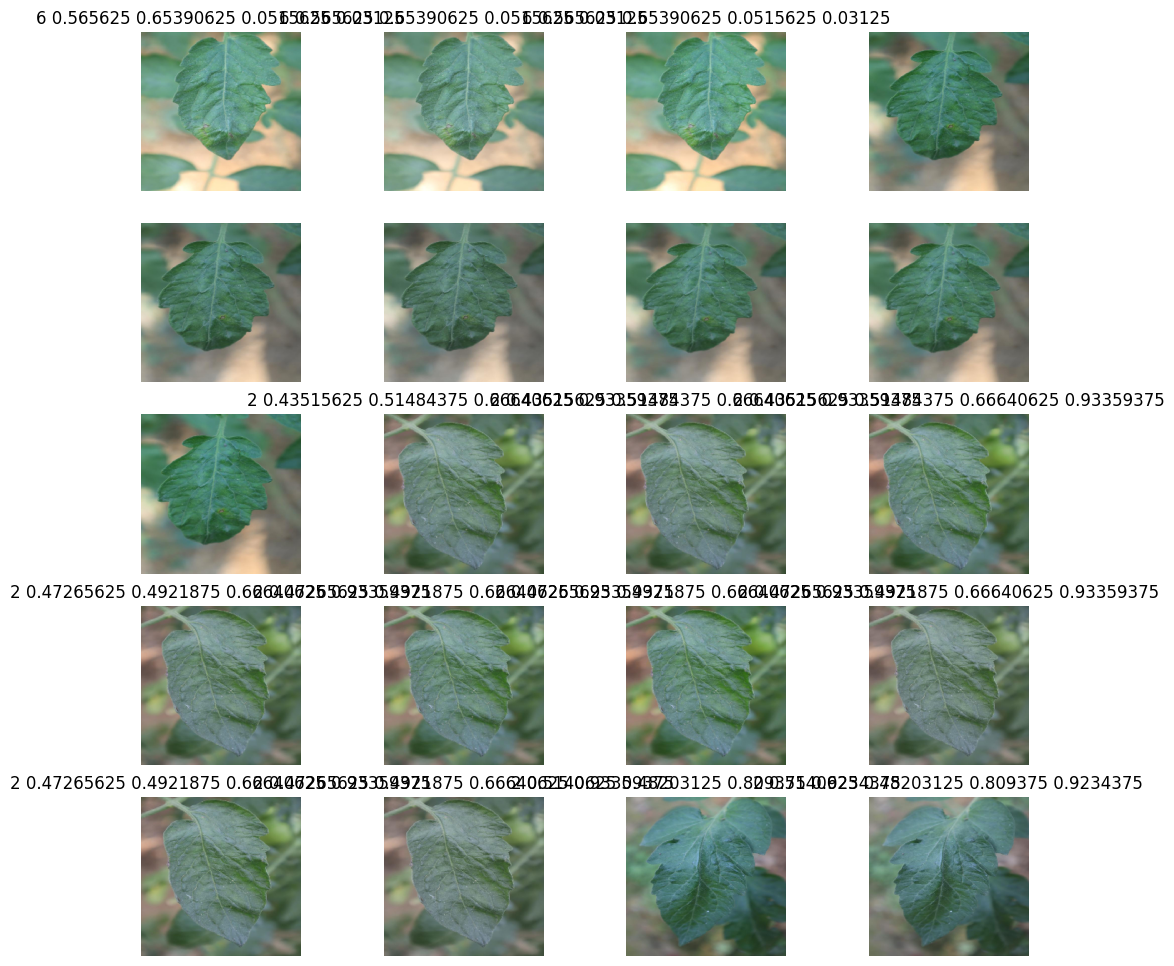

In [ ]:
plt.figure(figsize=(12, 12))

for i, img_file in enumerate(image_files[:20]):  # Show first 16 images
    img_path = os.path.join(image_dir, img_file)

    # Load image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input
    img_array = image.img_to_array(img) / 255.0  # Normalize

    # Get label (filename without extension)
    label_name = label_dict.get(img_file.replace('.jpg', '').replace('.png', ''), "Unknown")

    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(img_array)
    plt.title(label_name)  # Display the correct label
    plt.axis("off")

plt.show()
